In [1]:
#pip install pandas seaborn matplotlib gradio ollama

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = r"C:\Real Time Projects\EDA_LLM- Automation Mistral, gradio\titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Display dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


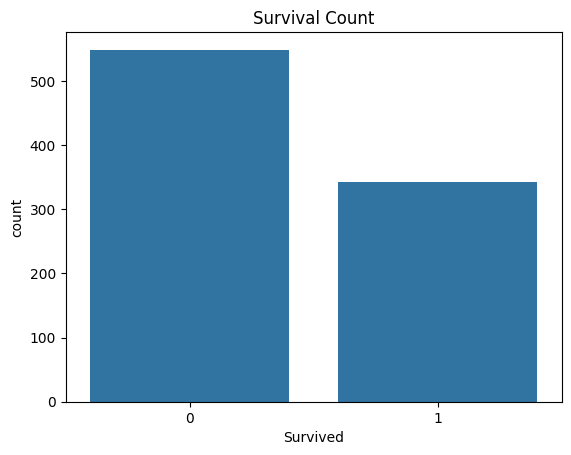

In [5]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [7]:
!pip install ollama

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 479.2 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 479.2 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 479.2 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 479.2 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 479.2 kB/s eta 0:00:03
   ---------------- ----------------------- 0.8/2.0 MB 349.5 kB/s e

In [12]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
  The dataset you've provided appears to be the Titanic passenger data, which includes various features such as PassengerId, Survived (whether the passenger survived or not), Pclass (ticket class), Age, SibSp (number of siblings/spouses aboard), Parch (number of parents/children aboard), and Fare.

Here are some insights based on the dataset summary:

1. **Count**: Each feature contains data for 891 passengers.

2. **Mean**: The mean age is 29.69 years, with a mean Pclass of 2.30, suggesting that most passengers were adults and from second-class cabins (as first class is Pclass=1 and third class is Pclass=3). The mean values for Survived, SibSp, Parch, and Fare are close to the mode (most common value), which is 0 in this case. This indicates that most passengers did not have siblings or parents on board, and the average fare was around 32.20 dollars.

3. **Standard Deviation**: The standard deviation for Age is 14.53 years, suggesting a wide range of ages amo

In [14]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached uvicorn-0.35.0-py3-none-any.whl.metadata (6.5 kB)
Using cached gradio-5.38.2-py3-none-any.whl (59.5 MB)
Using cached groovy-0.1.2-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/558.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/558.8 kB ? eta -:--:--
   ---------------------------------------- 558.8/558.8 kB 1.5 MB/s eta 0:00:00
Using cached python_multipart-0.0.20-py3-none-any.whl (24 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB

In [16]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch()  # Use share=True for Google Colab

* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.
